In [1]:
import xgboost as xgb
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

<ipython-input-1-3a5960cc92d2>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../Datasets/SBIN-EQ_1m_6months.csv')

In [4]:
df.head()

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
0,01-11-21 15:29,283.10,283.20,282.80,283.05,62812
1,01-11-21 15:28,283.15,283.35,282.95,283.10,112867
2,01-11-21 15:27,283.20,283.35,283.05,283.20,105989
3,01-11-21 15:26,283.15,283.25,283.00,283.15,103970
4,01-11-21 15:25,283.15,283.20,283.00,283.10,104628


In [5]:
Open = []
for i in df['SBIN-EQ O'][::-1]:
    Open.append(i)

In [6]:
Close = []
for i in df['SBIN-EQ C'][::-1]:
    Close.append(i)

In [7]:
df1 = pd.DataFrame({'Open':Open,'Close':Close})

In [8]:
x1 = df1[['Open']].values
y1 = df1[['Close']].values

In [9]:
train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size=0.2)

In [12]:
regressor_xgb = xgb.XGBRFRegressor(n_estimators=2000,min_child_weight=1.5,max_depth=7,subsample=0.5)

In [13]:
regressor_xgb = regressor_xgb.fit(train_x,train_y)


In [14]:
xgb_predictions = regressor_xgb.predict(test_x)
regressor_xgb

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=7,
               min_child_weight=1.5, missing=nan, monotone_constraints='()',
               n_estimators=2000, n_jobs=4, num_parallel_tree=2000,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, subsample=0.5, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [15]:
dframe_xgb = pd.DataFrame({'Actual':test_y.flatten(),'Predicted':xgb_predictions.flatten()})
dframe_xgb.head(25)

,Actual,Predicted
0,252.50,252.298828
1,245.45,245.256683
2,248.00,248.202332
3,246.15,245.954529
4,240.45,240.256866
5,271.55,271.550476
6,290.50,290.055420
7,277.65,277.882172
8,246.95,247.035339
9,252.95,253.224716


In [16]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y,xgb_predictions))
print('Mean Squred Error:', metrics.mean_squared_error(test_y,xgb_predictions))
print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(test_y,xgb_predictions)))




Mean Absolute Error: 0.18428258942853074
Mean Squred Error: 0.07266739641727125
Root Mean Squred Error: 0.2695689084766106


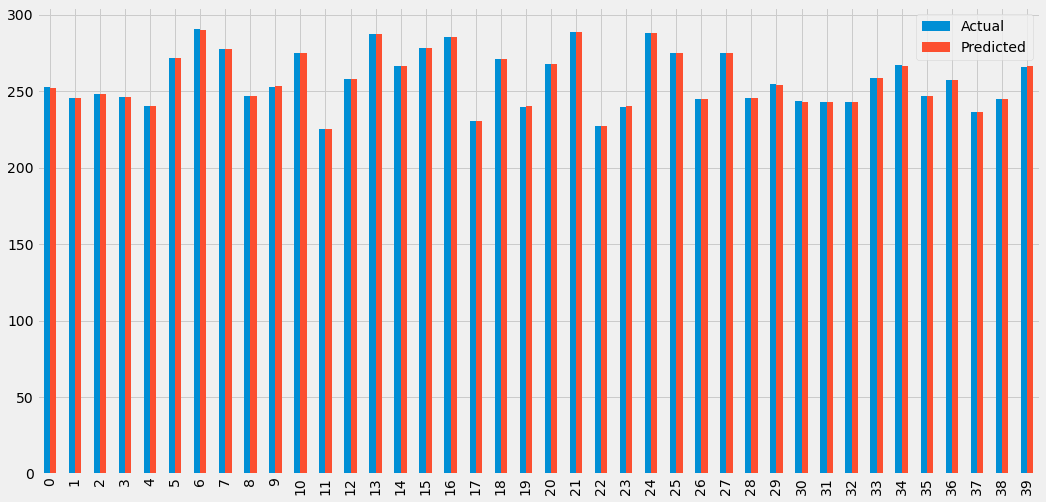

In [17]:
graph = dframe_xgb.head(40)
graph.plot(kind='bar',figsize=(16,8))

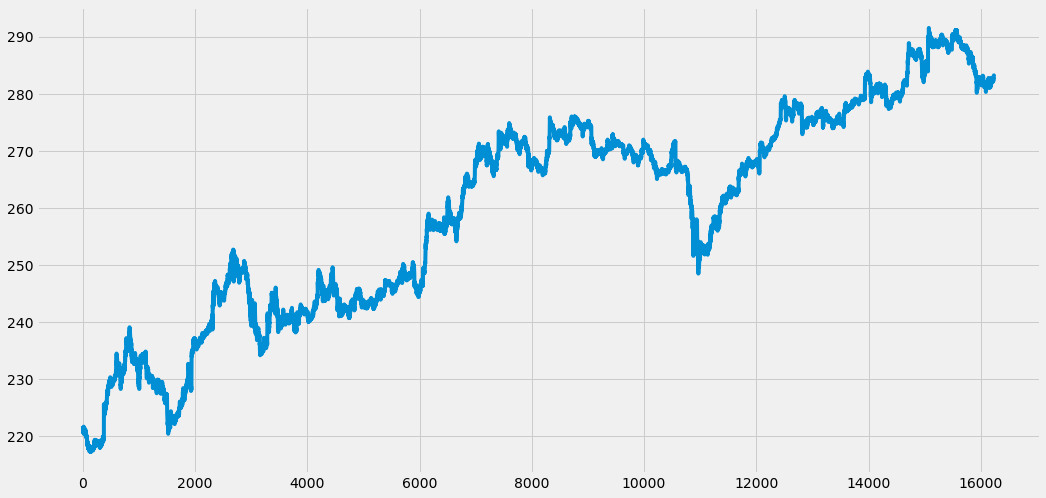

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df1['Close'])

In [19]:
prediction_of_all = regressor_xgb.predict(x1)

In [20]:
df_prediction_all =  pd.DataFrame({'PredictionClose':prediction_of_all})

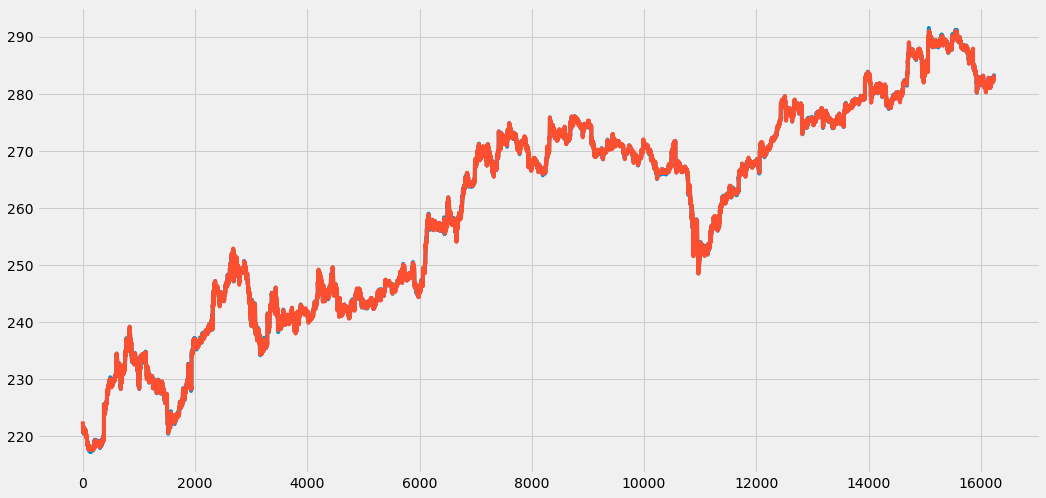

In [21]:
plt.figure(figsize=(16,8))
plt.plot(df1['Close'])
plt.plot(df_prediction_all['PredictionClose'])


In [22]:
df1["PrevClose"] = df1.Close.shift(-1)

In [23]:
df1.head()

,Open,Close,PrevClose
0,222.50,221.80,221.70
1,221.90,221.70,220.90
2,221.60,220.90,221.35
3,220.90,221.35,220.70
4,221.25,220.70,221.35


In [24]:
df2 = df1.drop(labels ='Open',axis=1)

In [25]:
df2.head()

,Close,PrevClose
0,221.80,221.70
1,221.70,220.90
2,220.90,221.35
3,221.35,220.70
4,220.70,221.35


In [26]:
def train_test_splits(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

In [27]:
train, test = train_test_splits(df2, 0.2)

In [28]:
print(len(df2))
print(len(train))
print(len(test))

16236
12988
3248


In [29]:
X = train[:, :-1]
Y = train[:, -1]

In [30]:
regressor_xgb2 = xgb.XGBRFRegressor(n_estimators=2000,min_child_weight=1.5,max_depth=7,subsample=0.5)

In [31]:
regressor_xgb2.fit(X, Y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=7,
               min_child_weight=1.5, missing=nan, monotone_constraints='()',
               n_estimators=2000, n_jobs=4, num_parallel_tree=2000,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, subsample=0.5, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [32]:
val = np.array(test[0, 0]).reshape(1, -1)
pred = regressor_xgb2.predict(val)
print(pred[0])

275.5913


In [33]:
def xgb_predict(train, val):
    train = np.array(train)
    X, Y = train[:, :-1], train[:, -1]
    regressor_xgb2 = xgb.XGBRFRegressor(n_estimators=2000,min_child_weight=1.5,max_depth=7,subsample=0.5)
    regressor_xgb2.fit(X, Y)

    val = np.array(val).reshape(1, -1)
    pred = regressor_xgb2.predict(val)
    return pred[0]

In [34]:
xgb_predict(train, test[0, 0])

275.5913

In [78]:
def validate(data, perc):
    predictions = []

    train, test = train_test_splits(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_Y = test[i, :-1], test[i, -1]

        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions

In [ ]:
validate(df2, 0.2).define()